# I] Import and options


In [9]:
import pandas, numpy, seaborn, scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
# have text as text and not curve in .svg
matplotlib.rcParams['svg.fonttype'] = 'none'
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':24, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(12, 8)})

In [10]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] DL data

## A) Extracellular Acidification Rate 

In [11]:
data = "number_mito_exp1", "number_mito_exp2", "number_mito_exp3"
conditions = 'DMSO+FCCP', 'BAF+FCCP'

mito_dmso_baf = []
for file in data: 
    #download data
    path = output_file_directory + 'ATG7/Mitotracker/'+file+".csv"
    df_brut = pandas.read_csv(path, sep = ",")
    
    for condition in conditions:
        #split dmso/baf
        df = df_brut.loc[df_brut['condition'] == condition]
        df = df.assign(mean_EVd= df['ATG7-/- +dox'].mean())
        df = df.assign(EVnorm= df['mean_EVd']/ df['mean_EVd'],
                                 ATG7_1norm= df['ATG7(1)']/ df['mean_EVd'],
                                 ATG7_2norm= df['ATG7(2)']/ df['mean_EVd'])
        df = df.rename(columns = {'ATG7_1norm' : 'ATG7(1)',
                                  'ATG7_2norm' : 'ATG7(2)'})
        df = (df.iloc[:,9:]
              .dropna(axis=0))
        mito_dmso_baf.append(df)

mito_dmso = pandas.concat([mito_dmso_baf[0], mito_dmso_baf[2], mito_dmso_baf[4]], axis=0)
mito_baf = pandas.concat([mito_dmso_baf[1], mito_dmso_baf[3], mito_dmso_baf[5]], axis=0)
mito_dmso

,EVnorm,ATG7(1),ATG7(2)
0,1.0,1.089776,1.089740
1,1.0,0.882325,0.983207
2,1.0,0.998413,1.021507
3,1.0,1.045509,1.064229
0,1.0,1.047431,1.075008
1,1.0,0.890579,0.938398
2,1.0,1.036593,1.016651
3,1.0,1.031766,1.048268
0,1.0,1.099255,1.108737
1,1.0,1.021362,1.002996


findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


the pvalue between ATG7(1) and ATG7(2) with DMSO is 4.655E-01


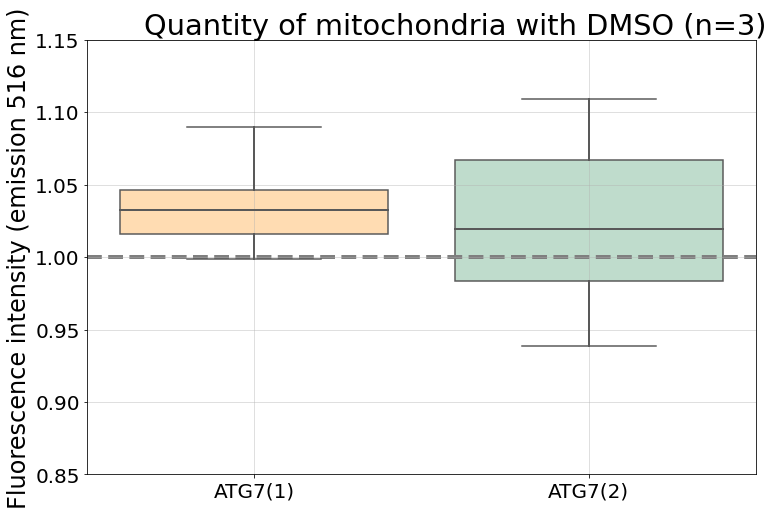

the pvalue between ATG7(1) and ATG7(2) with BAF is 3.975E-01


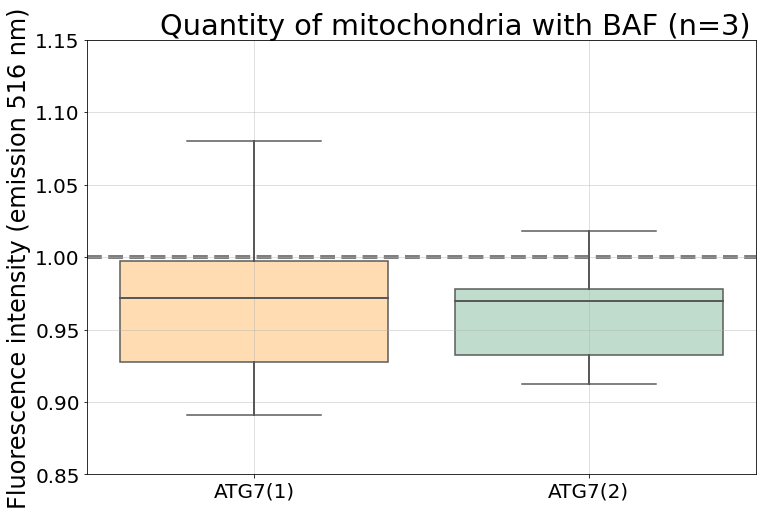

<Figure size 864x576 with 0 Axes>

In [12]:
all_data = [[mito_dmso, 'DMSO'], [mito_baf, 'BAF']]

for data in all_data:
    df = data[0]
    condition = data[1]
    
    # Mann-Whitney analysis 
    statistic, pvalue = scipy.stats.mannwhitneyu(df['ATG7(1)'], df['ATG7(2)'])
    Pvalue = "{:.3E}".format(pvalue)
    print("the pvalue between ATG7(1) and ATG7(2) with", condition,"is", Pvalue)

    #Graph, Bloxplot
    ax = seaborn.boxplot(palette = 'Set2', data = df.iloc[:,1:], 
                    medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    
    # Select which box you want to change    
    box_ATG7_1 = ax.artists[0]
    box_ATG7_1.set_facecolor('darkorange')
    box_ATG7_2 = ax.artists[1]
    box_ATG7_2.set_facecolor('seagreen')
    
    # adding transparency to colors
    for patch in ax.artists:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))
    
    plt.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    plt.ylabel('Fluorescence intensity (emission 516 nm)')
    plt.ylim(0.85,1.15)
    plt.xlabel('')
    text_title = 'Quantity of mitochondria with '+ condition+ ' (n=3)'
    plt.title(text_title, x=.55)
    plt.grid(alpha = 0.5)

    # save
    path = 'ATG7/Mitotracker/'
    text_file = 'graph_all_mitotracker_'+condition
    plt.savefig(output_file_directory+path+text_file+'.svg')
    plt.show()
    plt.clf()
